📓 Visualisasi Deteksi & Klasifikasi Jenis Botol dengan YOLOv8 dan MobileNetV2
-

In [1]:
# 🔧 1. Import Library yang Dibutuhkan
# Pemrosesan gambar
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import PIL
from PIL import Image

# Load model klasifikasi
import tensorflow as tf

# Load model deteksi YOLOv8 dari ultralytics
import ultralytics
from ultralytics import YOLO

# Show version Libraries
print("OpenCV version      :", cv2.__version__)
print("TensorFlow version  :", tf.__version__)
print("NumPy version       :", np.__version__)
print("Matplotlib version  :", matplotlib.__version__)
print("Pillow (PIL) version:", PIL.__version__)
print("Ultralytics version :", ultralytics.__version__)

OpenCV version      : 4.11.0
TensorFlow version  : 2.19.0
NumPy version       : 1.26.4
Matplotlib version  : 3.10.3
Pillow (PIL) version: 11.2.1
Ultralytics version : 8.3.134


In [2]:
import os

IMAGE_EXTENSIONS = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.webp'}

def is_image_file(filename):
    ext = os.path.splitext(filename)[1].lower()
    return ext in IMAGE_EXTENSIONS

def print_directory_tree(path, indent=""):
    items = sorted(os.listdir(path))
    
    files = [f for f in items if os.path.isfile(os.path.join(path, f))]
    dirs = [d for d in items if os.path.isdir(os.path.join(path, d))]

    # Cek apakah folder hanya berisi file gambar (dan mungkin tidak ada folder lain)
    if len(dirs) == 0 and files and all(is_image_file(f) for f in files):
        exts_in_folder = sorted(set(os.path.splitext(f)[1].lower() for f in files))
        exts_display = ", ".join(exts_in_folder)
        count_files = len(files)
        print(indent + f"└── {os.path.basename(path)} (contains {count_files} files: {exts_display})")
        return

    for i, item in enumerate(items):
        item_path = os.path.join(path, item)
        is_dir = os.path.isdir(item_path)
        connector = "└── " if i == len(items) - 1 else "├── "
        
        if is_dir:
            print(indent + connector + item)
            extension = "    " if i == len(items) - 1 else "│   "
            print_directory_tree(item_path, indent + extension)
        else:
            print(indent + connector + item)

# Jalankan fungsi dari current working directory
current_path = os.getcwd()
print(f"Current working directory: {current_path}\n")
print_directory_tree(current_path)

Current working directory: C:\Users\Admin\Documents\Kode Python\Deteksi Objek\FINAL

├── .ipynb_checkpoints
│   └── Visualisasi Deteksi & Klasifikasi Jenis Botol dengan YOLOv8 dan MobileNetV2-checkpoint.ipynb
├── Visualisasi Deteksi & Klasifikasi Jenis Botol dengan YOLOv8 dan MobileNetV2.ipynb
├── dataset_train
│   ├── Beer Bottle
│   │   └── Beer Bottle (contains 4000 files: .jpg)
│   ├── Plastic Bottle
│   │   └── Plastic Bottle (contains 4000 files: .jpg)
│   ├── Soda Bottle
│   │   └── Soda Bottle (contains 4000 files: .jpg)
│   ├── Water Bottle
│   │   └── Water Bottle (contains 4000 files: .jpg)
│   └── Wine Bottle
│       └── Wine Bottle (contains 4000 files: .jpg)
└── model
    ├── mobilenetv2-tuning.keras
    ├── yolo.onnx
    └── yolo.pt


In [3]:
# 📦 2. Load Model Deteksi (YOLOv8) dan Klasifikasi (MobileNetV2)

import os

# Cek keberadaan file model dulu sebelum load
assert os.path.exists("model/yolo.pt"), "File model YOLO tidak ditemukan!"
assert os.path.exists("model/mobilenetv2-tuning.keras"), "File model MobileNetV2 tidak ditemukan!"

## Load model YOLOv8
yolo_model = YOLO("model/yolo.pt")
print("Model YOLO berhasil di load\n")
## Load model MobileNetV2
mobilenet_model = tf.keras.models.load_model("model/mobilenetv2-tuning.keras")
print("Model MobileNetv2 berhasil di load\n")

## Info YOLOv8
print("YOLOv8 model summary/info:")
yolo_model.info()

## Summary MobileNetV2
print("\nMobileNetV2 model summary:")
mobilenet_model.summary()

Model YOLO berhasil di load

Model MobileNetv2 berhasil di load

YOLOv8 model summary/info:
Model summary: 129 layers, 3,011,043 parameters, 0 gradients, 8.2 GFLOPs

MobileNetV2 model summary:


Model: "MobileNetv2_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 6,724,945 (25.65 MB)

 Trainable params: 2,230,277 (8.51 MB)

 Non-trainable params: 34,112 (133.25 KB)

 Optimizer params: 4,460,556 (17.02 MB)

In [4]:
# 🖼️ 3. Fungsi untuk Menampilkan Gambar dengan Matplotlib
def show_image(img, title='Image'):
    """
    Menampilkan gambar dengan matplotlib.
    OpenCV membaca gambar dalam format BGR, jadi kita konversi ke RGB agar warna tampil benar.
    """
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

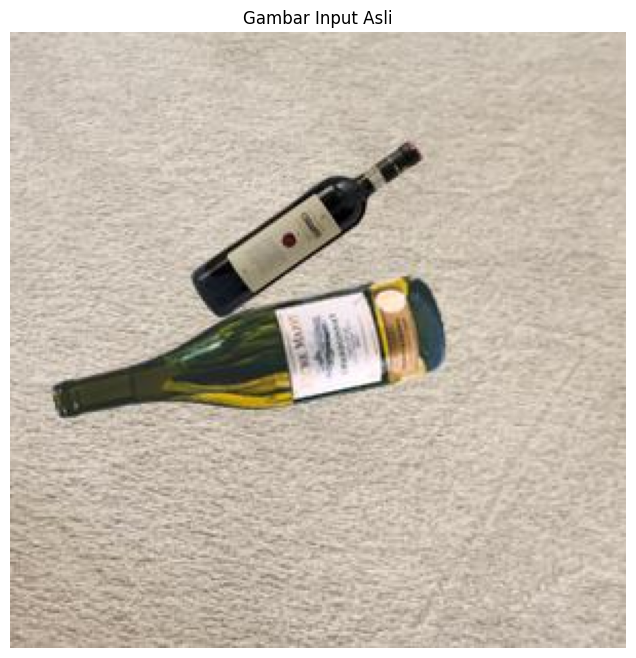


0: 640x640 2 bottles, 126.9ms
Speed: 7.4ms preprocess, 126.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

Jumlah objek terdeteksi: 2


In [5]:
# 🧪 4. Load Gambar Uji dan Jalankan Deteksi dengan YOLOv8

image_path = "dataset_train/Wine Bottle/00000400.jpg"
assert os.path.exists(image_path), f"File gambar uji tidak ditemukan di {image_path}"

img = cv2.imread(image_path)
assert img is not None, f"Gagal memuat gambar dari {image_path}"

# Tampilkan gambar input asli terlebih dahulu
show_image(img, title="Gambar Input Asli")

# Jalankan prediksi deteksi objek dengan YOLOv8 pada gambar
results = yolo_model.predict(img)[0]  # Ambil hasil prediksi untuk gambar pertama

print(f"\nJumlah objek terdeteksi: {len(results.boxes)}")

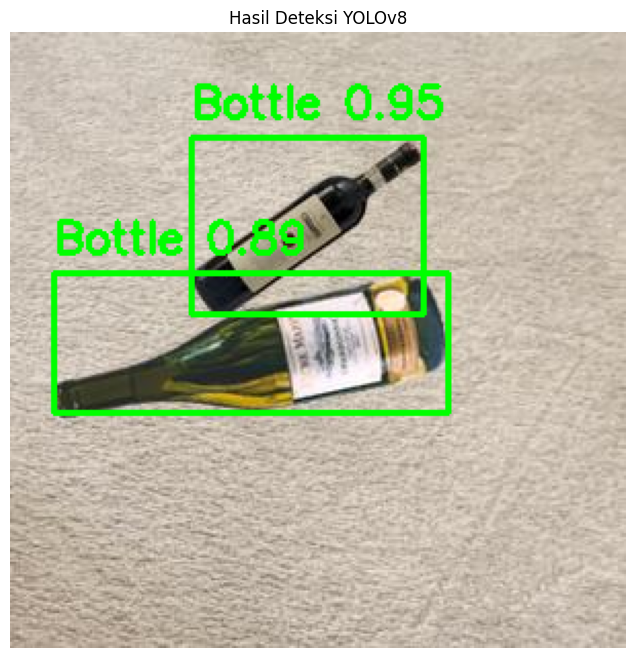

In [6]:
# 🧪 Visualisasi hasil deteksi YOLOv8 sebelum cropping dan klasifikasi

# Salin gambar asli agar tidak tertimpa
img_with_boxes = img.copy()

# Loop setiap bounding box yang terdeteksi dan gambar di img_with_boxes
for box in results.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = box.conf[0]  # confidence score
    cls = int(box.cls[0])  # kelas deteksi (nomor label)

    # Gambar kotak hijau dengan ketebalan 2
    cv2.rectangle(img_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Label dengan confidence
    label = f"Bottle {conf:.2f}"
    cv2.putText(img_with_boxes, label, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Tampilkan gambar dengan bounding box hasil deteksi
show_image(img_with_boxes, title="Hasil Deteksi YOLOv8")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


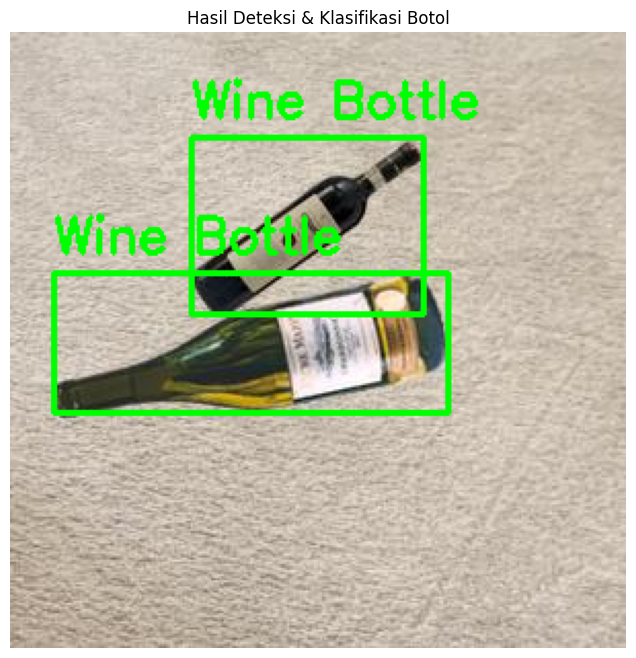

In [7]:
# ✂️ 5. Crop dan Klasifikasikan Setiap Botol yang Terdeteksi
class_labels = ['Beer Bottle', 'Plastic Bottle', 'Soda Bottle', 'Water Bottle', 'Wine Bottle']

for box in results.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])  # koordinat bounding box (x1, y1, x2, y2)

    # Crop image sesuai bounding box
    cropped = img[y1:y2, x1:x2]

    # Preprocessing sesuai input MobileNetV2
    cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(cropped, (224, 224))
    normalized = resized / 255.0
    input_img = np.expand_dims(normalized, axis=0)

    # Prediksi klasifikasi botol
    preds = mobilenet_model.predict(input_img)
    pred_idx = np.argmax(preds)
    label = class_labels[pred_idx]

    # Gambar bounding box dan label pada gambar asli
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, label, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# 🔍 6. Tampilkan Gambar Akhir dengan Deteksi dan Klasifikasi
show_image(img, title="Hasil Deteksi & Klasifikasi Botol")